In [1]:
import math

import schemdraw
from schemdraw import flow
import schemdraw.elements as elm
schemdraw.use('svg')

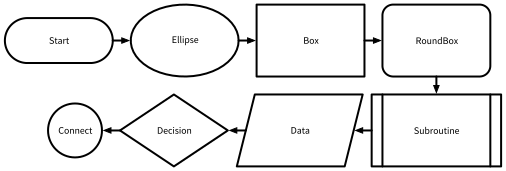

In [2]:
with schemdraw.Drawing(fontsize=10, unit=.5):
    flow.Start().label('Start').drop('E')
    flow.Arrow()
    flow.Ellipse().label('Ellipse')
    flow.Arrow()
    flow.Box(label='Box')
    flow.Arrow()
    flow.RoundBox(label='RoundBox').drop('S')
    flow.Arrow().down()
    flow.Subroutine(label='Subroutine').drop('W')
    flow.Arrow().left()
    flow.Data(label='Data')
    flow.Arrow()
    flow.Decision(label='Decision')
    flow.Arrow()
    flow.Connect(label='Connect')

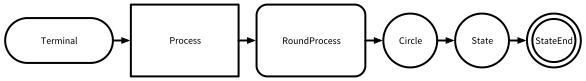

In [3]:
# Duplicate names
with schemdraw.Drawing(fontsize=10, unit=.5):
    flow.Terminal().label('Terminal').drop('E')
    flow.Arrow()
    flow.Process().label('Process')
    flow.Arrow()
    flow.RoundProcess().label('RoundProcess')
    flow.Arrow()
    flow.Circle(label='Circle')
    flow.Arrow()
    flow.State(label='State')
    flow.Arrow()
    flow.StateEnd(label='StateEnd')

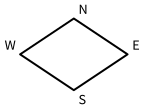

In [4]:
flow.Decision(N='N', S='S', E='E', W='W')

In [5]:
def testanchors(element, **kwargs):
    d = schemdraw.Drawing()
    d += (box := element(**kwargs))
    d += elm.Dot(radius=.1).at(box.N).color('red')
    d += elm.Dot(radius=.1).at(box.NNE).color('orangered')
    d += elm.Dot(radius=.1).at(box.NE).color('orange')
    d += elm.Dot(radius=.1).at(box.ENE).color('gold')
    d += elm.Dot(radius=.1).at(box.E).color('yellow')
    d += elm.Dot(radius=.1).at(box.ESE).color('yellowgreen')
    d += elm.Dot(radius=.1).at(box.SE).color('green')
    d += elm.Dot(radius=.1).at(box.SSE).color('lightseagreen')
    d += elm.Dot(radius=.1).at(box.S).color('turquoise')
    d += elm.Dot(radius=.1).at(box.SSW).color('teal')
    d += elm.Dot(radius=.1).at(box.SW).color('blue')
    d += elm.Dot(radius=.1).at(box.WSW).color('darkslateblue')
    d += elm.Dot(radius=.1).at(box.W).color('blueviolet')
    d += elm.Dot(radius=.1).at(box.WNW).color('darkviolet')
    d += elm.Dot(radius=.1).at(box.NW).color('violet')
    d += elm.Dot(radius=.1).at(box.NNW).color('mediumvioletred')
    return d

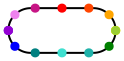

In [6]:
testanchors(flow.Start)

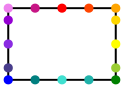

In [7]:
testanchors(flow.Box)

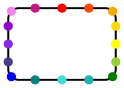

In [8]:
testanchors(flow.RoundBox)

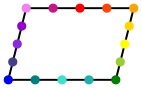

In [9]:
testanchors(flow.Data)

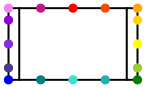

In [10]:
testanchors(flow.Subroutine)

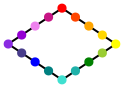

In [11]:
testanchors(flow.Decision)

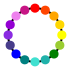

In [12]:
testanchors(flow.Circle)

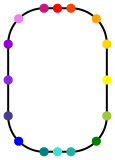

In [13]:
testanchors(flow.RoundBox, cornerradius=1, w=2.75, h=4)

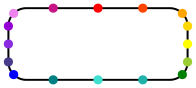

In [14]:
testanchors(flow.RoundBox, cornerradius=.5, w=5, h=2)

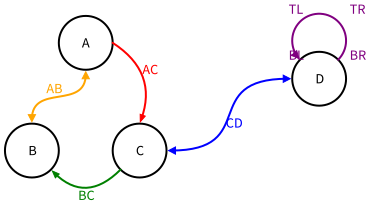

In [15]:
with schemdraw.Drawing():
    A = flow.State().label('A').at((1.5, 3))
    B = flow.State().label('B').at((0, 0))
    C = flow.State().label('C').at((3, 0))
    D = flow.State().label('D').at((8, 2))

    elm.Arc2(arrow='>', k=.4).at(A.E).to(C.N).color('red').label('AC')
    elm.ArcZ(arrow='<>').at(C.E).to(D.W).color('blue').label('CD')
    elm.ArcN(arrow='<>').at(A.S).to(B.N).color('orange').label('AB')
    elm.Arc2(arrow='>', k=.5).at(C.SW).to(B.SE).color('green').label('BC')
    (elm.ArcLoop(radius=.75,arrow='<').at(D.NW).to(D.NE).color('purple')
          .label('TR', loc='TR').label('TL', loc='TL').label('BR', loc='BR').label('BL', loc='BL'))

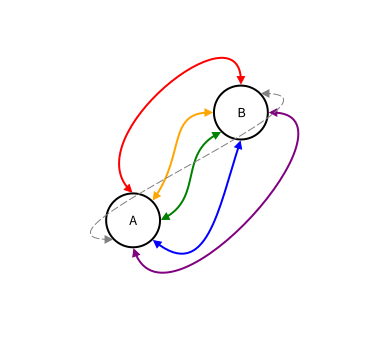

In [16]:
with schemdraw.Drawing():
    A = flow.State().label('A')
    B = flow.State().label('B').at((3, 3))
    a1 = elm.Arc3(th1=135, th2=90, arrow='<>').at(A.N).to(B.N).color('red')
    elm.Arc3(th1=45, th2=180, arrow='<>').at(A.NE).to(B.W).color('orange')
    elm.Arc3(th1=20, th2=200, arrow='<>').at(A.E).to(B.SW).color('green')
    a2 = elm.Arc3(th1=-35, th2=-110, arrow='<>').at(A.SE).to(B.S).color('blue')
    elm.Arc3(th1=-70, th2=0, arrow='<>').at(A.S).to(B.E).color('purple')
    elm.Arc3(th1=180, th2=0, arrow='<>').at(A.SW).to(B.NE).color('gray').linewidth(1).linestyle('--')

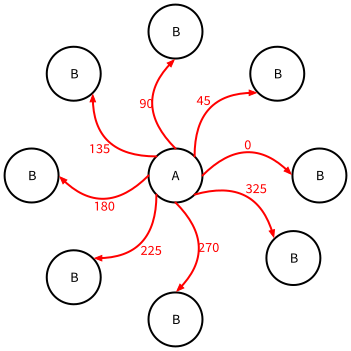

In [17]:
with schemdraw.Drawing():
    A = flow.State().label('A')
    circles = []
    for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                                   ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                                   ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
        x = 4*math.cos(math.radians(th))
        y = 4*math.sin(math.radians(th))
        circles.append(flow.Circle().label('B').at((x, y)))
        elm.Arc2(arrow='>').at(A.absanchors[anchor]).to(circles[-1].absanchors[anchor2]).color('red').label(str(th))

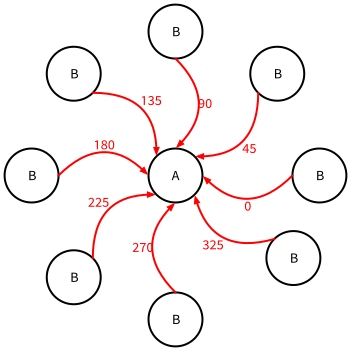

In [18]:
with schemdraw.Drawing():
    A = flow.State().label('A')
    circles = []
    for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                                   ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                                   ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
        x = 4*math.cos(math.radians(th))
        y = 4*math.sin(math.radians(th))
        circles.append(flow.Circle().label('B').at((x, y)))
        elm.Arc2(arrow='>').to(A.absanchors[anchor]).at(circles[-1].absanchors[anchor2]).color('red').label(str(th))

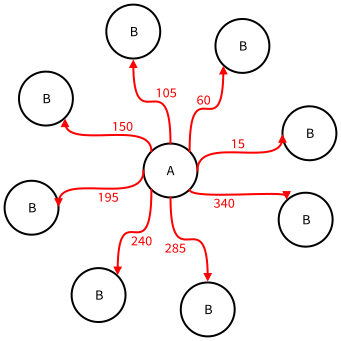

In [19]:
with schemdraw.Drawing():
    A = flow.State().label('A')
    circles = []
    for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                                   ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                                   ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
        x = 4*math.cos(math.radians(th+15))
        y = 4*math.sin(math.radians(th+15))
        circles.append(flow.Circle().label('B').at((x, y)))
        elm.ArcN(k=1, arrow='<').to(A.absanchors[anchor]).at(circles[-1].absanchors[anchor2]).color('red').label(str(th+15))

In [20]:
schemdraw.config(unit=1.5)

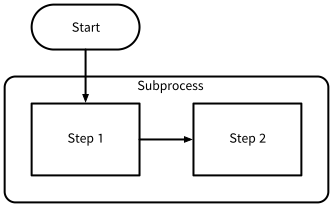

In [21]:
with schemdraw.Drawing() as d:
    flow.Start().label('Start')
    flow.Arrow().down()
    with d.container() as c:
        flow.Box().label('Step 1').drop('E')
        flow.Arrow().right()
        flow.Box().label('Step 2')
        c.label('Subprocess', loc='N', halign='center', valign='top')

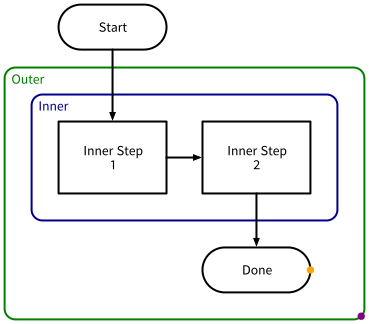

In [22]:
# Nested Container Elements
with schemdraw.Drawing() as d:
    d.config(unit=1)
    flow.Start().label('Start')
    flow.Arrow().down().length(2)
    with d.container() as c:
        with c.container() as c2:
            flow.Box().label('Inner Step\n1').drop('E')
            flow.Arrow().right()
            flow.Box().label('Inner Step\n2').drop('S')
            c2.label('Inner')
            c2.color('darkblue')
        flow.Arrow().down().length(1.5)
        box2 = flow.Terminal().label('Done')
        c.color('green')
        c.label('Outer')
    elm.Dot().at(box2.E).color('orange')
    elm.Dot().at(c.SE).color('purple')